# Housing Rental Analysis for San Francisco

In this challenge, your job is to use your data visualization skills, including aggregation, interactive visualizations, and geospatial analysis, to find properties in the San Francisco market that are viable investment opportunities.

## Instructions

Use the `san_francisco_housing.ipynb` notebook to visualize and analyze the real-estate data.

Note that this assignment requires you to create a visualization by using hvPlot and GeoViews. Additionally, you need to read the `sfo_neighborhoods_census_data.csv` file from the `Resources` folder into the notebook and create the DataFrame that you’ll use in the analysis.

The main task in this Challenge is to visualize and analyze the real-estate data in your Jupyter notebook. Use the `san_francisco_housing.ipynb` notebook to complete the following tasks:

* Calculate and plot the housing units per year.

* Calculate and plot the average prices per square foot.

* Compare the average prices by neighborhood.

* Build an interactive neighborhood map.

* Compose your data story.

### Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?

### Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?

### Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

### Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with hvPlot and GeoViews. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

    * Set the `geo` parameter to True.
    * Set the `size` parameter to “sale_price_sqr_foot”.
    * Set the `color` parameter to “gross_rent”.
    * Set the `frame_width` parameter to 700.
    * Set the `frame_height` parameter to 500.
    * Include a descriptive title.

Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with hvPlot and GeoViews.](Images/6-4-geoviews-plot.png)

5. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

### Compose Your Data Story

Based on the visualizations that you created, answer the following questions:

* How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

* What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

In [18]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path
import matplotlib.pyplot as plt

## Import the data 

In [19]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighborhoods_census_data.csv file from the Resources folder
sfo_data_df = pd.read_csv(
    Path('./Resources/sfo_neighborhoods_census_data.csv')
)

# Review the first and last five rows of the DataFrame
display(sfo_data_df.head())
display(sfo_data_df.tail())

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390
396,2016,Westwood Park,631.195426,384242,4390


---

## Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?



### Step 1: Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

In [3]:
# Create a numerical aggregation that groups the data by the year and then averages the results.
housing_units_by_year = (
    sfo_data_df[["housing_units", "year"]]
    .groupby("year")
    .mean()
    .sort_values("year")
)

# Review the DataFrame
housing_units_by_year

,housing_units
year,
2010,372560.0
2011,374507.0
2012,376454.0
2013,378401.0
2014,380348.0
2015,382295.0
2016,384242.0


### Step 2: Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

### Step 3: Style and format the line plot to ensure a professionally styled visualization.

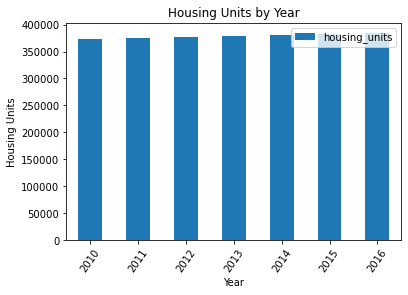

In [111]:
# Create a visual aggregation explore the housing units by year
housing_units_by_year.plot(kind = "bar")
plt.title("Housing Units by Year")
plt.xlabel("Year")
plt.ylabel("Housing Units")
plt.xticks(rotation = 55)

plt.show()

### Step 5: Answer the following question:

**Question:** What is the overall trend in housing_units over the period being analyzed?

**Answer:** Increase in the number of housing units in San Francisco year over year. 

---

## Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?



### Step 1: Group the data by year, and then average the results.

In [5]:
# Create a numerical aggregation by grouping the data by year and averaging the results
prices_square_foot_by_year = (
    sfo_data_df[["sale_price_sqr_foot", "year"]]
    .groupby("year")
    .mean()
    .sort_values("year")
).hvplot(
    xlabel='Gross Rent/Sale Price Per Square Foot',
    ylabel='Year', 
    rot=45,
    label='Sale Price per Square Foot',
).opts(
    yformatter='%.0f', 
    line_color="blue", 
    hover_line_color="yellow"
)  

gross_rent = (
    sfo_data_df[["gross_rent", "year"]]
    .groupby("year")
    .mean()
    .sort_values("year")
).hvplot(
    xlabel='Gross Rent/Sale Price Per Square Foot',
    ylabel='Year', 
    rot=45,
    label='Gross Rent',
).opts(
    yformatter='%.0f', 
    line_color="orange", 
    hover_line_color="yellow"
)  


# Review the resulting DataFrame
prices_square_foot_by_year * gross_rent

:Overlay
   .Curve.Sale_Price_per_Square_Foot :Curve   [year]   (sale_price_sqr_foot)
   .Curve.Gross_Rent                 :Curve   [year]   (gross_rent)

**Question:** What is the lowest gross rent reported for the years included in the DataFrame?

**Answer:** # Year 2010

### Step 2: Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

In [9]:
# Filter out the housing_units column, creating a new DataFrame 
# Keep only sale_price_sqr_foot and gross_rent averages per year
prices_square_foot_by_year = (
    sfo_data_df[["sale_price_sqr_foot", "year"]]
    .groupby("year")
    .mean()
    .sort_values("year")
).hvplot(
    xlabel='Gross Rent/Sale Price Per Square Foot',
    ylabel='Year', 
    rot=45,
    label='Sale Price per Square Foot',
).opts(
    yformatter='%.0f', 
    line_color="blue", 
    hover_line_color="yellow"
)  

gross_rent = (
    sfo_data_df[["gross_rent", "year"]]
    .groupby("year")
    .mean()
    .sort_values("year")
).hvplot(
    xlabel='Gross Rent/Sale Price Per Square Foot',
    ylabel='Year', 
    rot=45,
    label='Gross Rent',
).opts(
    yformatter='%.0f', 
    line_color="orange", 
    hover_line_color="yellow"
)  


# Review the DataFrame
gross_rent

:Curve   [year]   (gross_rent)

### Step 3: Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

> **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`

### Step 4: Style and format the line plot to ensure a professionally styled visualization.


In [10]:
# Plot prices_square_foot_by_year. 
# Inclued labels for the x- and y-axes, and a title.
prices_square_foot_by_year * gross_rent

:Overlay
   .Curve.Sale_Price_per_Square_Foot :Curve   [year]   (sale_price_sqr_foot)
   .Curve.Gross_Rent                 :Curve   [year]   (gross_rent)

### Step 6: Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

**Question:** Did any year experience a drop in the average sale price per square foot compared to the previous year?

**Answer:** No

**Question:** If so, did the gross rent increase or decrease during that year?

**Answer:** # N/A

---

## Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 


### Step 1: Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

In [107]:
# Group by year and neighborhood and then create a new dataframe of the mean values
prices_by_year_by_neighborhood = (
    sfo_data_df
    .groupby(["year", "neighborhood"])["sale_price_sqr_foot"]
    .agg('mean')
).hvplot(
    xlabel='Gross Rent/Sale Price Per Square Foot',
    ylabel='Year', 
    rot=45,
    label='Sale Price per Square Foot',
).opts(
    yformatter='%.0f', 
    line_color="blue", 
    hover_line_color="yellow"
)  
    
# Review the DataFrame
prices_by_year_by_neighborhood

:Curve   [year]   (sale_price_sqr_foot)

### Step 2: Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

In [108]:
# Filter out the housing_units
gross_rent_by_year_by_neighborhood = (
    sfo_data_df
    .groupby(["year", "neighborhood"])["gross_rent"]
    .agg('mean')
).hvplot(
    xlabel='Gross Rent/Sale Price Per Square Foot',
    ylabel='Year', 
    rot=45,
    label='Gross Rent',
).opts(
    yformatter='%.0f', 
    line_color="orange", 
    hover_line_color="yellow"
)  

# Review the first and last five rows of the DataFrame
gross_rent_by_year_by_neighborhood

:Curve   [year]   (gross_rent)

### Step 3: Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

### Step 4: Style and format the line plot to ensure a professionally styled visualization.

In [109]:
# Use hvplot to create an interactive line plot of the average price per square foot
# The plot should have a dropdown selector for the neighborhood
prices_by_year_by_neighborhood * gross_rent_by_year_by_neighborhood

:Overlay
   .Curve.Sale_Price_per_Square_Foot :Curve   [year]   (sale_price_sqr_foot)
   .Curve.Gross_Rent                 :Curve   [year]   (gross_rent)

### Step 6: Use the interactive visualization to answer the following question:

**Question:** For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

**Answer:** More

---

## Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with hvPlot and GeoViews. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `size_max` parameter to “25”.

    * Set the `zoom` parameter to “11”.

Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with hvPlot and GeoViews.](Images/6-4-geoviews-plot.png)

5. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?


### Step 1: Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

In [67]:
# Load neighborhoods coordinates data
neighborhood_locations_df = pd.read_csv(
    Path('./Resources/neighborhoods_coordinates.csv'),
    index_col='Neighborhood', 
)

# Review the DataFrame
neighborhood_locations_df

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
...,...,...
West Portal,37.740260,-122.463880
Western Addition,37.792980,-122.435790
Westwood Highlands,37.734700,-122.456854


### Step 2: Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

In [90]:
# Calculate the mean values for each neighborhood
all_neighborhood_info_df = (
    sfo_data_df[["sale_price_sqr_foot", "gross_rent", "neighborhood"]]
    .groupby("neighborhood")
    .mean()
)

# Review the resulting DataFrame
all_neighborhood_info_df

,sale_price_sqr_foot,gross_rent
neighborhood,,
Alamo Square,366.020712,2817.285714
Anza Vista,373.382198,3031.833333
Bayview,204.588623,2318.400000
Bayview Heights,590.792839,3739.000000
Bernal Heights,576.746488,3080.333333
...,...,...
West Portal,498.488485,2515.500000
Western Addition,307.562201,2555.166667
Westwood Highlands,533.703935,2250.500000


### Step 3: Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. 

Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. 

The second cell cleans the data and sets the “Neighborhood” column. 

Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

In [91]:
# Using the Pandas `concat` function, join the 
# neighborhood_locations_df and the all_neighborhood_info_df DataFrame
# The axis of the concatenation is "columns".
# The concat function will automatially combine columns with
# identical information, while keeping the additional columns.
all_neighborhoods_df = pd.concat(
    [neighborhood_locations_df, all_neighborhood_info_df], 
    axis="columns",
    sort=False
)

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())

,Lat,Lon,sale_price_sqr_foot,gross_rent
Alamo Square,37.791012,-122.402100,366.020712,2817.285714
Anza Vista,37.779598,-122.443451,373.382198,3031.833333
Bayview,37.734670,-122.401060,204.588623,2318.400000
Bayview Heights,37.728740,-122.410980,590.792839,3739.000000
Bernal Heights,37.728630,-122.443050,NaN,NaN


,Lat,Lon,sale_price_sqr_foot,gross_rent
Yerba Buena,37.79298,-122.39636,576.709848,2555.166667
Bernal Heights,NaN,NaN,576.746488,3080.333333
Downtown,NaN,NaN,391.434378,2817.285714
Ingleside,NaN,NaN,367.895144,2509.000000
Outer Richmond,NaN,NaN,473.900773,2817.285714


In [92]:
# Call the dropna function to remove any neighborhoods that do not have data
all_neighborhoods_df = all_neighborhoods_df.reset_index().dropna()

# Rename the "index" column as "Neighborhood" for use in the Visualization
all_neighborhoods_df = all_neighborhoods_df.rename(columns={"index": "Neighborhood"})

# Review the resulting DataFrame
all_neighborhoods_df

,Neighborhood,Lat,Lon,sale_price_sqr_foot,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,3739.000000
5,Buena Vista Park,37.768160,-122.439330,452.680591,2698.833333
...,...,...,...,...,...
68,West Portal,37.740260,-122.463880,498.488485,2515.500000
69,Western Addition,37.792980,-122.435790,307.562201,2555.166667
70,Westwood Highlands,37.734700,-122.456854,533.703935,2250.500000
71,Westwood Park,37.734150,-122.457000,687.087575,3959.000000


### Step 4: Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

* Set the `geo` parameter to True.
* Set the `size` parameter to “sale_price_sqr_foot”.
* Set the `color` parameter to “gross_rent”.
* Set the `frame_width` parameter to 700.
* Set the `frame_height` parameter to 500.
* Include a descriptive title.

In [116]:
# Create a plot to analyze neighborhood info
all_neighborhoods_plot = all_neighborhoods_df.hvplot.points(
    'Lon', 
    'Lat', 
    geo=True,
    color='gross_rent',
    alpha=0.8,
    size = 'sale_price_sqr_foot',
    tiles='OSM',
    frame_width = 700,
    frame_height = 500,
    title='San Francisco Neighborhoods Price per SqrFt'
    )

all_neighborhoods_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (gross_rent,sale_price_sqr_foot)

### Step 5: Use the interactive map to answer the following question:

**Question:** Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

**Answer:** # Westwood Park, $3959

## Compose Your Data Story

Based on the visualizations that you have created, compose a data story that synthesizes your analysis by answering the following questions:

**Question:**  How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

**Answer:** Rent has increased at a much high rate than the proce per square foot for all neighborhoods in San Francisco. 

**Question:** What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

**Answer:** In general I would advise against this strategy. I do not think this product has market viability given the recent trend we have seen with Zillow. 